- 5) PCA (Principal Components Analysis)

    - input data format?
        - PCA requires LD-pruned marker
        - offspring data will probably bias the result
        - PLINK file with alleles as 1 and 2 (becase this makes processing easier with smartpca and scikit-learn)
            - (hapmap10_auto_noofs_ld_12)


## 1) [smartpca](https://data.broadinstitute.org/alkesgroup/EIGENSOFT/)

## 2) scikit-learn

In [1]:
import os

from genomics.popgen.pca import plot
%matplotlib inline

from sklearn.decomposition import PCA
import numpy as np

i) **ind_pop** 

In [2]:
f = open('relationships_w_pops_121708.txt')
ind_pop = {}
f.readline()  # header
for l in f:
    toks = l.rstrip().split('\t')
    fam_id = toks[0]
    ind_id = toks[1]
    pop = toks[-1]
    ind_pop['/'.join([fam_id, ind_id])] = pop
f.close()
ind_pop['2469/NA20281'] = ind_pop['2805/NA20281'] # entry 정보 맞춰서 추가

In [3]:
print len(ind_pop)

1302


ii) **ind_order** 각 개인의 (fam_id, ind_id) append

In [4]:
f = open('hapmap10_auto_noofs_ld_12.ped')
ninds = 0
ind_order = []
for line in f:
    ninds += 1
    toks = line[:100].replace(' ', '\t').split('\t') #  for speed
    fam_id = toks[0]
    ind_id = toks[1]
    ind_order.append('%s/%s' % (fam_id, ind_id))
nsnps = (len(line.replace(' ', '\t').split('\t')) - 6) // 2
print (nsnps)
f.close()

55165


iii) **pca_array** 각 snp마다 
- major allele homo 일 경우: (22-> 2)
- hetero일 경우: (12 or 21 ->1)
- minor allele homo일 경우 : (11 ->0) 할당

In [5]:
n_components = np.empty((ninds, nsnps), dtype=int)
print pca_array.shape
f = open('hapmap10_auto_noofs_ld_12.ped')
for ind, line in enumerate(f):
    snps = line.replace(' ', '\t').split('\t')[6:]
    for pos in range(len(snps) // 2):
        a1 = int(snps[2 * pos])
        a2 = int(snps[2 * pos])
        my_code = a1 + a2 - 2
        pca_array[ind, pos] = my_code
f.close()
#slow

(988, 55165)


In [10]:
my_pca = PCA(n_components=8)
my_pca.fit(pca_array)
trans = my_pca.transform(pca_array)
#Memory required

In [11]:
print trans.shape

(988, 8)


- plot1 - 1,2
- plot2 - 3,4
- plot3 - 5,6
- plot4 - 7,8

In [8]:
sc_ind_comp = {}
for i, ind_pca in enumerate(trans):
    sc_ind_comp[ind_order[i]] = ind_pca

(<matplotlib.figure.Figure at 0x7f724cf88450>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f7232d63910>])

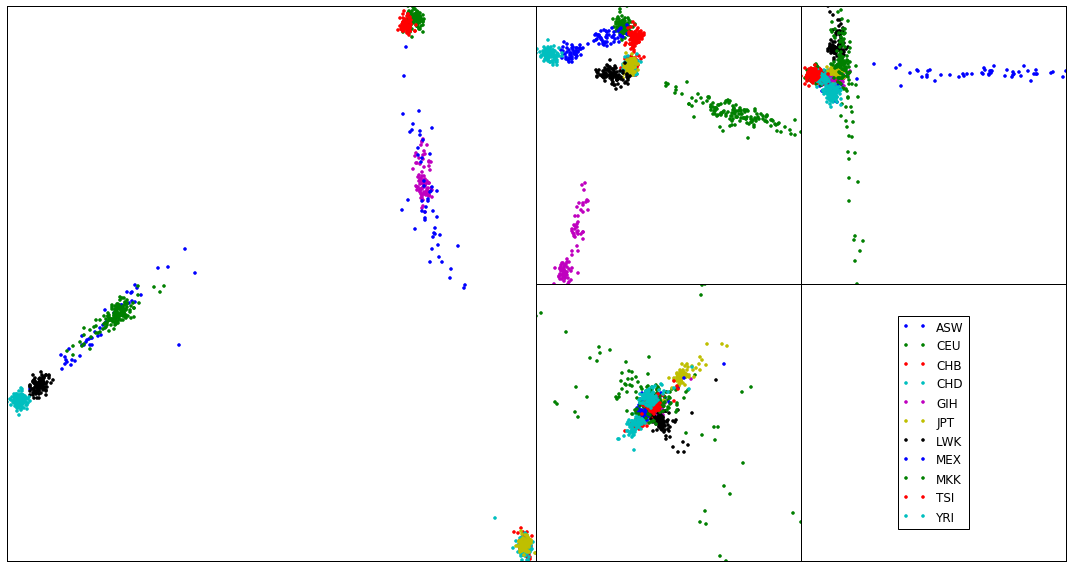

In [9]:
plot.render_pca_eight(sc_ind_comp, cluster=ind_pop)

(<matplotlib.figure.Figure at 0x7f7256b94d90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f724d2684d0>)

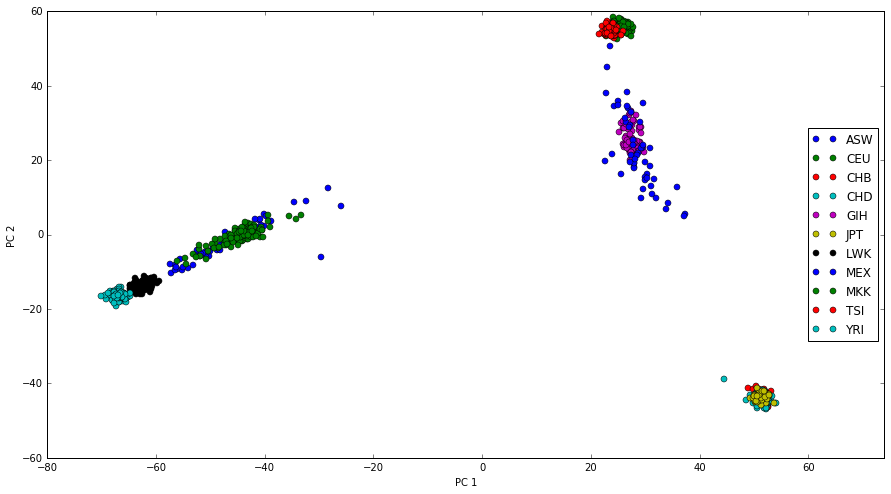

In [11]:
plot.render_pca(sc_ind_comp, 1, 2, cluster=ind_pop)